In [2]:
import numpy as np
import pandas as pd
import kagglehub
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn import preprocessing
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [28]:
path = kagglehub.dataset_download("gauravtopre/bank-customer-churn-dataset")

In [4]:
df = pd.read_csv('bank_customer_churn.csv')
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
df.drop(['customer_id'],axis=1,inplace=True)
labelencoder = LabelEncoder()
df['gender'] = labelencoder.fit_transform(df['gender'])

In [ ]:
# labelencoder = LabelEncoder()
# df['country'] = labelencoder.fit_transform(df['country'])

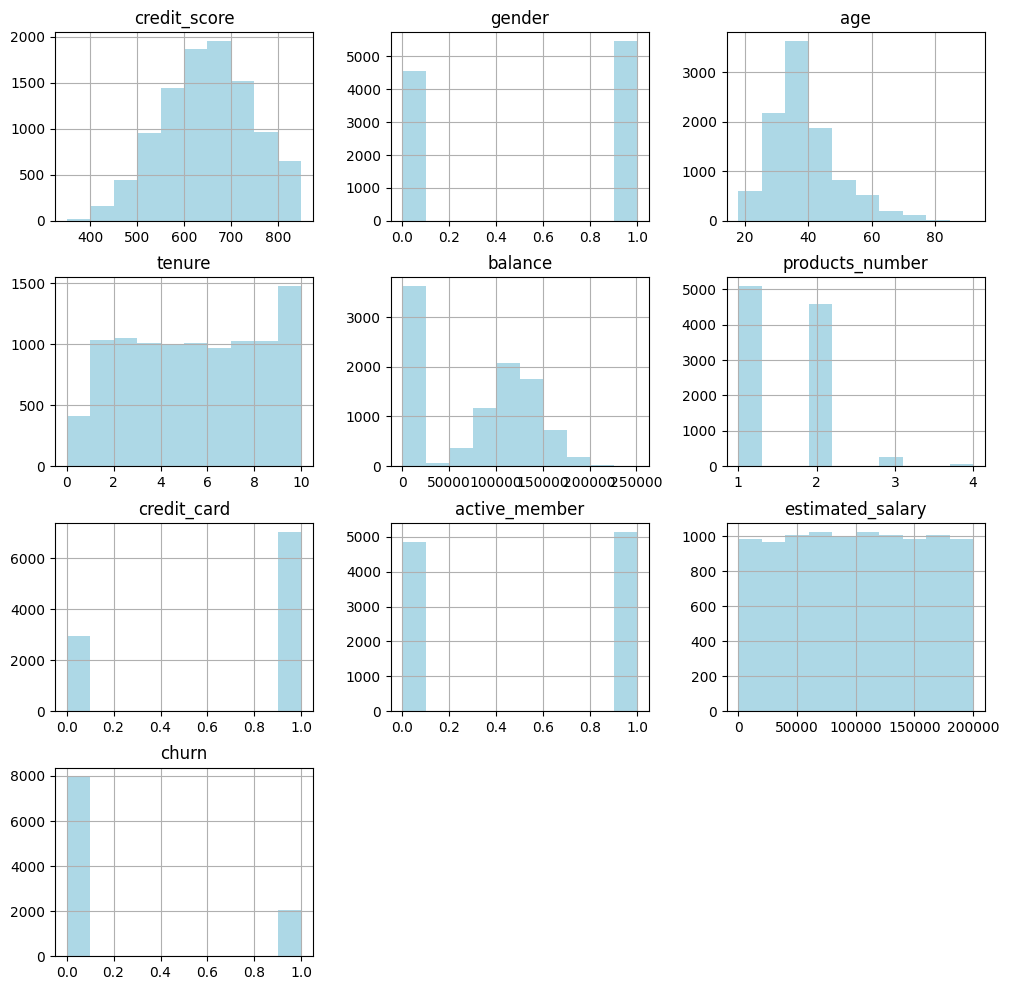

In [31]:
df.hist(figsize=(12,12),color='lightblue')
plt.show()

In [32]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [33]:
df['products_number'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: products_number, dtype: float64

In [34]:
df['balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

In [35]:
df['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

In [6]:
df['balance'] = pd.cut(df['balance'], bins=5, labels=[0,1,2,3,4])
df['balance'].value_counts()

balance
2    3828
0    3692
1    1533
3     915
4      32
Name: count, dtype: int64

In [7]:
df['estimated_salary'] = pd.cut(df['estimated_salary'], bins=5,labels=[0,1,2,3,4])
df['estimated_salary'].value_counts()

estimated_salary
1    2033
2    2029
4    1994
3    1989
0    1955
Name: count, dtype: int64

In [8]:
df['credit_score_group'] = pd.cut(df['credit_score'], bins=[0, 600, 700, 850], labels=[0,1,2])
df['credit_score_group'].value_counts()

credit_score_group
1    3818
2    3116
0    3066
Name: count, dtype: int64

In [9]:
df.drop(['credit_score'],axis=1,inplace=True)

In [ ]:
# df['long_time_customer'] = df['tenure'].apply(lambda x:0 if x <= 2 else 1)

In [10]:
def life_stage(age):
    if age >= 18 and age<=25:
        return 0
    elif age < 60:
        return 1
    else:
        return 2
    
df['life_stage'] = df['age'].apply(life_stage)


In [11]:
df.drop(['age'],axis=1,inplace=True)

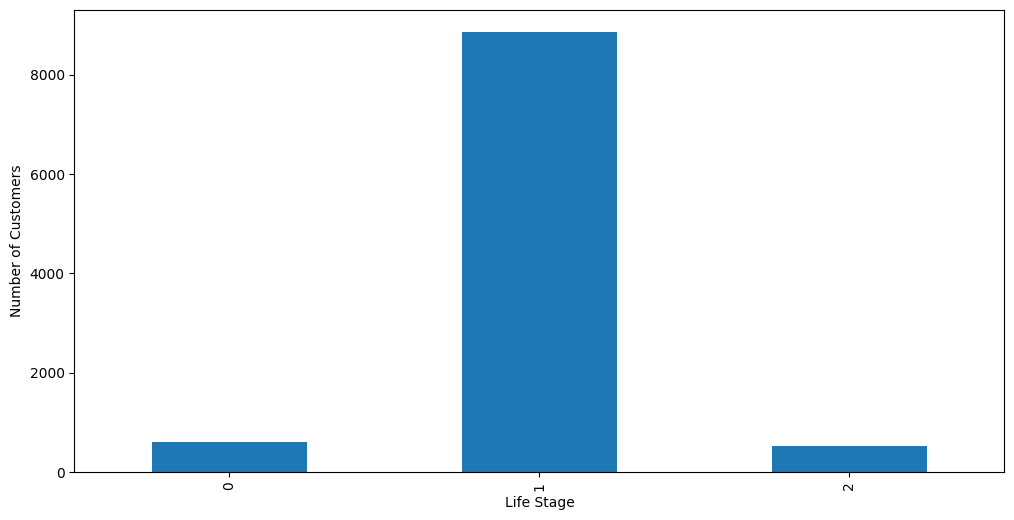

In [12]:
plt.figure(figsize=(12,6))
age_counts = df['life_stage'].value_counts().sort_index()
age_counts.plot(kind='bar')
plt.xlabel('Life Stage')
plt.ylabel('Number of Customers')
plt.show()

In [13]:
df = pd.get_dummies(df,columns=['country'],dtype=int, drop_first=True)

In [14]:
df.head()

,gender,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_score_group,life_stage,country_Germany,country_Spain
0,0,2,0,1,1,1,2,1,1,1,0,0
1,0,1,1,1,0,1,2,0,1,1,0,1
2,0,8,3,3,1,0,2,1,0,1,0,0
3,0,1,0,2,0,0,2,0,1,1,0,0
4,0,2,2,1,1,1,1,0,2,1,0,1


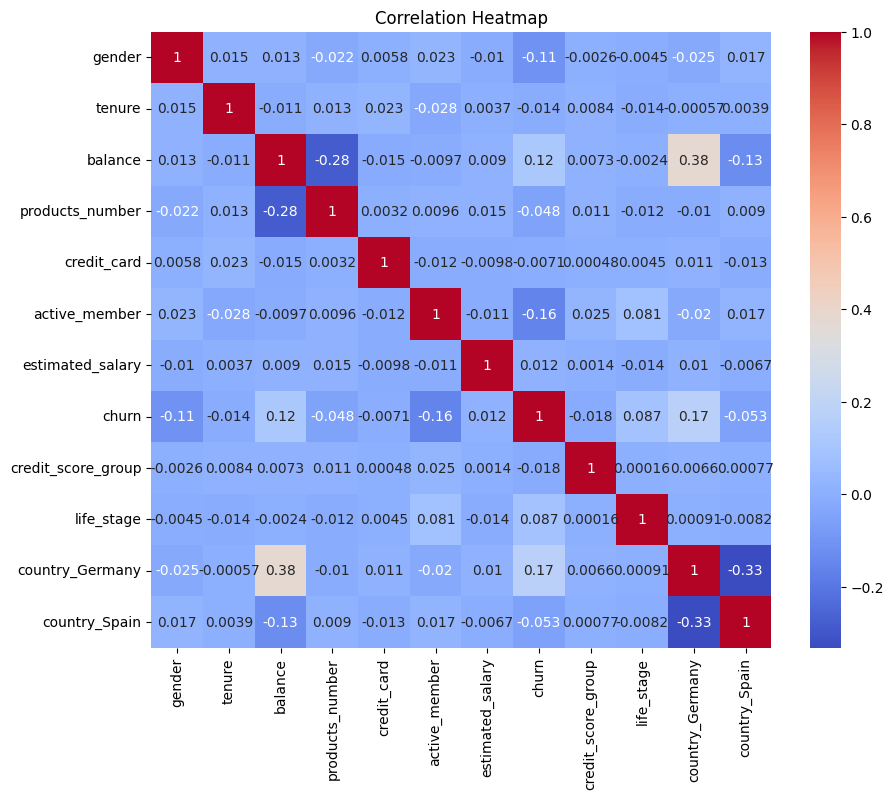

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
X = df.drop(['churn'],axis=1)
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)
y = df['churn']


In [29]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [18]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClass Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6506378802747792

Class Report:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       546
           1       0.62      0.63      0.63       473

    accuracy                           0.65      1019
   macro avg       0.65      0.65      0.65      1019
weighted avg       0.65      0.65      0.65      1019


Confusion Matrix:
[[363 183]
 [173 300]]


In [31]:
svc = SVC(probability=True,kernel='rbf',random_state=42)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClass Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7546459065796083

Class Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      2036
           1       0.74      0.77      0.75      1946

    accuracy                           0.75      3982
   macro avg       0.75      0.75      0.75      3982
weighted avg       0.76      0.75      0.75      3982


Confusion Matrix:
[[1509  527]
 [ 450 1496]]


In [ ]:
import pickle

with open('svc_model.pkl', 'wb') as file:
    pickle.dump(svc, file)

In [33]:
import joblib

joblib.dump(svc,'svc_joblib.joblib')

['svc_joblib.joblib']

In [46]:
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
y_scores = svc.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline to scale features and train SVC
svc = make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))

# Train the model
svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True, random_state=42))])

In [50]:
y_scores = svc.predict_proba(X_test)[:, 1]

In [51]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

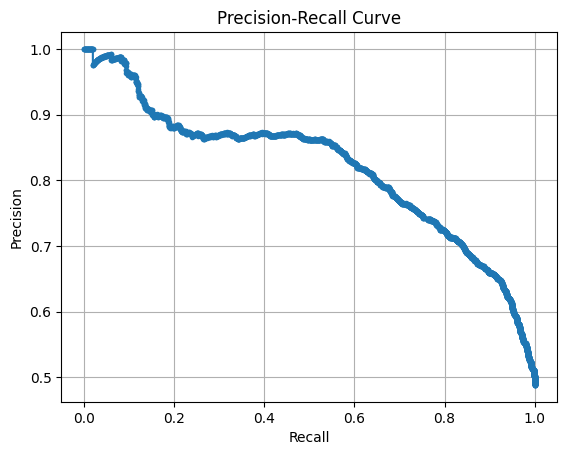

In [52]:
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [53]:
import numpy as np
from sklearn.metrics import f1_score

# Compute F1-score for each threshold
f1_scores = [f1_score(y_test, y_scores >= t) for t in thresholds]

# Find the threshold that maximizes F1-score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Max F1-score: {f1_scores[optimal_idx]:.3f}")

Optimal threshold: 0.355
Max F1-score: 0.765


In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClass Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7546459065796083

Class Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      2036
           1       0.74      0.77      0.75      1946

    accuracy                           0.75      3982
   macro avg       0.75      0.75      0.75      3982
weighted avg       0.76      0.75      0.75      3982


Confusion Matrix:
[[1509  527]
 [ 450 1496]]


In [56]:
y_pred_new = (y_scores >= optimal_threshold).astype(int)

# Evaluate the new predictions
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix with New Threshold:")
print(confusion_matrix(y_test, y_pred_new))
print("\nClassification Report with New Threshold:")
print(classification_report(y_test, y_pred_new))

Confusion Matrix with New Threshold:
[[1361  675]
 [ 322 1624]]

Classification Report with New Threshold:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73      2036
           1       0.71      0.83      0.77      1946

    accuracy                           0.75      3982
   macro avg       0.76      0.75      0.75      3982
weighted avg       0.76      0.75      0.75      3982



In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVC(), X, y, cv=5, scoring='f1')
print(scores.mean(), scores.std())

0.39570573929278663 0.018064937238339376


In [58]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=9)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7825213460572576


In [59]:
print("\nClass Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Class Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2036
           1       0.83      0.70      0.76      1946

    accuracy                           0.78      3982
   macro avg       0.79      0.78      0.78      3982
weighted avg       0.79      0.78      0.78      3982


Confusion Matrix:
[[1755  281]
 [ 585 1361]]


In [344]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_1,country_2
0,619,0,42,2,0,1,1,1,2,1,0,0
1,608,0,41,1,1,1,0,1,2,0,0,1
2,502,0,42,8,3,3,1,0,2,1,0,0
3,699,0,39,1,0,2,0,0,2,0,0,0
4,850,0,43,2,2,1,1,1,1,0,0,1


In [34]:
def countries(country):
    if country.lower() == 'germany':
        return (1,0)
    elif country.lower() == 'spain':
        return (0,1)
    else:
        return (0,0)

In [35]:
example_data = [[780,0,43,5,2,2,1,1,2]]
for i in countries("germany"):
    example_data[0].append(countries("germany")[i])

In [36]:
for i in range(len(example_data[0])):
    print(example_data[0][i])

780
0
43
5
2
2
1
1
2
0
1


In [58]:
y_scores_new = model.predict_proba(example_data)[:, 1]

y_pred_new = (y_scores_new >= optimal_threshold).astype(int)

y_pred_new

array([0])

In [28]:
param_dist = {'n_estimators': list(np.random.randint(50, 500, size=100)), 'max_depth': list(np.random.randint(1, 20, size=100))}

ERF = ExtraTreesClassifier()
erf_random = RandomizedSearchCV(estimator=ERF, param_distributions=param_dist, n_iter=100, cv=4, verbose=2, random_state=42, n_jobs=-1)
erf_random.fit(X_train, y_train)
best_erf = erf_random.best_estimator_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


In [33]:
#ERF=ExtraTreesClassifier(n_estimators=500,max_depth=13,criterion='gini',random_state=45)
#ERF.fit(X_train,y_train)
y_pred = best_erf.predict(X_test)
print("accuracy:", accuracy_score(y_test,y_pred))

accuracy: 0.8749372174786539


In [41]:
param_dist = {'n_estimators': list(np.random.randint(50, 500, size=100)), 'max_depth': list(np.random.randint(1, 20, size=100))}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [42]:
y_rf_pred = best_rf.predict(X_test)
print("acc:", accuracy_score(y_test,y_pred))
print("\nClass Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc: 0.7546459065796083

Class Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      2036
           1       0.74      0.77      0.75      1946

    accuracy                           0.75      3982
   macro avg       0.75      0.75      0.75      3982
weighted avg       0.76      0.75      0.75      3982


Confusion Matrix:
[[1509  527]
 [ 450 1496]]


In [44]:
joblib.dump(best_rf,'rf_joblib.joblib')

['rf_joblib.joblib']

In [43]:
y_test_pred = best_rf.predict(example_data)
y_test_pred

array([1], dtype=int64)

In [64]:
import pickle

with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

In [35]:
voting_clf = VotingClassifier(estimators=[('erf', best_erf),('svm',svc)],voting='soft')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('erf',
                              ExtraTreesClassifier(max_depth=19,
                                                   n_estimators=375)),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')

In [36]:
y_pred = voting_clf.predict(X_test)
print("\nClass Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Class Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2036
           1       0.85      0.87      0.86      1946

    accuracy                           0.86      3982
   macro avg       0.86      0.86      0.86      3982
weighted avg       0.86      0.86      0.86      3982


Confusion Matrix:
[[1738  298]
 [ 257 1689]]
